<a href="https://colab.research.google.com/github/JNSDKV/BANK-MARKETING-EFFECTIVENESS-PREDICTION/blob/main/_Bank_Marketing_Effectiveness_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** PERWEZ ALAM


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/JNSDKV

# **Problem Statement**


The project Iam  working on involves analyzing data from a Portuguese bank's phone-based marketing campaign to determine if clients are likely to subscribe to a term deposit. The bank made multiple phone calls to clients to see if they were interested in the term deposit, and my task is to predict whether or not a client will subscribe based on the data you have. I will use classification techniques to make this prediction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy.stats import *


# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})

### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df= pd.read_csv('/content/drive/MyDrive/ALMA BETTER/bank-full.csv',sep=';')

### Dataset First View

In [7]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape


(45211, 17)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There is no duplicate values in our dataset.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It seems that there is no missing values in any of the variable of the dataset . But as values which were not known has been replaced by "unknown" and which will be considered as one value in itself. So, I need to work on it to resolve the issue.

In [12]:
# Replacing Unknown entry in the dataset across the columns with np.nan
df = df.replace('unknown', np.nan)

In [13]:
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
poutcome,45211,36959,81.75
contact,45211,13020,28.80
education,45211,1857,4.11
job,45211,288,0.64
month,45211,0,0.00
previous,45211,0,0.00
pdays,45211,0,0.00
campaign,45211,0,0.00
duration,45211,0,0.00
age,45211,0,0.00


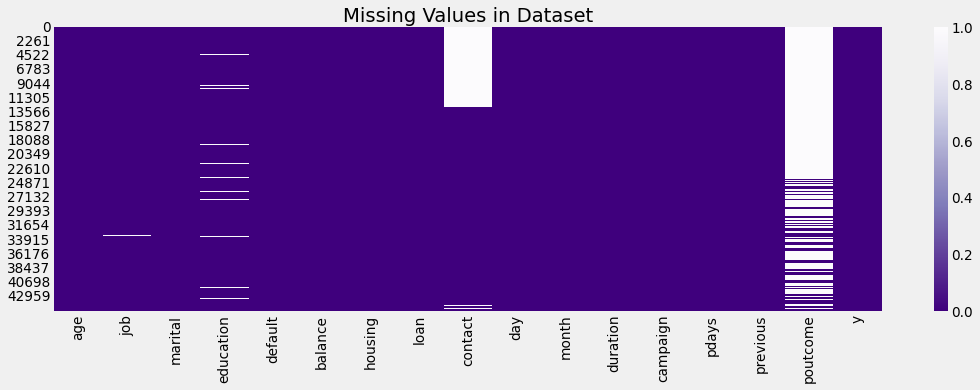

In [14]:
# Visualizing the missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True,cmap="Purples_r")
plt.xticks()
plt.title('Missing Values in Dataset')
plt.show()

### What did you know about your dataset?

Based on the initial overview of the dataset, here are the observations:

*  The dataset contains 45,211 records and 17 columns.
*  There are 10 categorical features with object data type and 7 continuous features with either integer or float data types.
*  There is no duplicate values in the dataset.
*  We noticed that some columns have unknown values, which were replaced with np.nan and then counted.
*  Specifically, the Education, Contact, and poutcome columns have missing values.
*  To handle these missing values, further data exploration and cleaning may be necessary. Depending on the amount and nature of the missing values, one possible approach could be to impute the missing values with mean, median or mode values for the respective columns. Alternatively, we may consider dropping the rows or columns with missing values if they are not critical for our analysis.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Variables Description 

**______ job _______**
*   This feature represents the type of job of the potential customers, with 12 unique categories including management, technician, entrepreneur, blue-collar, unknown, retired, admin, services, self-employed, unemployed, housemaid, and student. There are 0.64% unknown values in this column.

**_______ martial _______**
*   This column represents the marital status of the potential customers, with three unique categories including married, single, and divorced. Majority of the customers (60%) are married.

**_______ education _______** 
*  This column represents the educational qualification of the potential customers, with three unique categories including tertiary, secondary, and primary. There are 4.11% unknown values in this column, and the majority of customers (61%) have a secondary education.

**_______ default _______**
*   This column represents whether the customer has credit in default or not, with two unique categories including yes or no. We observed that 98% of the population does not have credit in default.

**_______ housing _______**
*   This column represents whether the customer has a housing loan or not, with two unique categories including yes or no. The data is evenly distributed in this column.

**_______ loan _______**
*   This column represents whether the customer has opted for any kind of loan or not, with two unique categories including yes or no. Majority of customers fall in the 'no' category.

**_______ contact _______** 
*   This column represents the mode of establishment of communication between customers and the bank, with two unique values including cellular and telephone. We observed 28.80% unknown values in this column. Most of the customers have been contacted on a cell phone.

**_______ month _______**
*   This column represents the month in which the customers were last contacted, with most customers contacted in the month of May, followed by July and August.

**_______ poutcome _______**
*   This column suggests the outcome of the last campaign, with four categories including failure, others, and success. 81% of the data were found to be unknown.

**_______ y (term_deposit) _______**
*   This is the target variable which represents whether the customer went for a term deposit or not, with two fields including yes or no. We observed a class imbalance in the target variable, which needs to be treated before putting it into the model.

**_______ age _______**
*   This feature represents the age of the potential customers, with a mean around 40 and median close to the mean.
balance: This feature depicts the account balance, with a huge gap between the mean and median.

**_______ day _______**
*   This feature represents the day of the month (1 to 31) on which the customer was last contacted.

**_______ duration _______**
*   This feature depicts the time duration for which the customer was last contacted. Note that it should be only included for benchmark purposes and ignored if the objective is a realistic predictive model.

**_______ campaign _______**
*   This feature represents how many times each prospective consumer was contacted as part of the current campaign.

**_______ pdays _______**
*   This feature represents the number of days passed by after the client was contacted from a previous campaign, with most clients not being contacted at all, which is represented by -1 in the dataset.

**_______ previous _______**  
*  This feature represents the number of contacts performed before this campaign.






### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                            [married, single, divorced]
education                  [tertiary, secondary, nan, primary]
default                                              [no, yes]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                              [yes, no]
loan                                                 [no, yes]
contact                             [nan, cellular, telephone]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month        [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                        [nan, failure, other, s

In [18]:
# creating a list of categorical and continuous features
categorical_list = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

continuous_list = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']

In [19]:
df[continuous_list]

,age,balance,day,duration,campaign,previous
0,58,2143,5,261,1,0
1,44,29,5,151,1,0
2,33,2,5,76,1,0
3,47,1506,5,92,1,0
4,33,1,5,198,1,0
...,...,...,...,...,...,...
45206,51,825,17,977,3,0
45207,71,1729,17,456,2,0
45208,72,5715,17,1127,5,3
45209,57,668,17,508,4,0


In [20]:
print("Unique values in these categorical features: \n")
for i in categorical_list:
  print(f'Unique values in {i}---------->>  {df[i].unique()}')

Unique values in these categorical features: 

Unique values in job---------->>  ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in marital---------->>  ['married' 'single' 'divorced']
Unique values in education---------->>  ['tertiary' 'secondary' nan 'primary']
Unique values in default---------->>  ['no' 'yes']
Unique values in housing---------->>  ['yes' 'no']
Unique values in loan---------->>  ['no' 'yes']
Unique values in contact---------->>  [nan 'cellular' 'telephone']
Unique values in month---------->>  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome---------->>  [nan 'failure' 'other' 'success']
Unique values in y---------->>  ['no' 'yes']


## 3. ***Data Wrangling***

### Data Wrangling Code

## **Handling missing values.**

In [21]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [22]:
# replacing null values in job , education , contact with mode in respective columns
null_list = ['job','education','contact']
for i in null_list:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [23]:
# replacing null or unknown values with the category 'other' 
df['poutcome'].fillna('other',inplace=True)

In [24]:
df['p_contacted'] = [0 if x == -1 else 1 for x in df.pdays]
df.drop(columns=['pdays'], inplace=True)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,p_contacted
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,other,no,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,other,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,other,no,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,other,no,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,other,no,0


In [25]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
previous       0
poutcome       0
y              0
p_contacted    0
dtype: int64

[**  Finally we dont have any null values in the dataset*]







### What all manipulations have you done and insights you found?

1. **Job**: There were 288 nan values in this column. So we substituted the same with the mode of the column i.e. "Blue Collar jobs" as it was a categorical variable.
2. **Education**: There were 1857 nan values in this column, we substituted it  with the mode i.e. "Secondary Education".
3. **Contact**: Since there are 13,020 nan values in this column and we are aware that cellular communication is currently the most preferred one, we made the assumption that the nan values might be replaced with cellular type values. And also the mode of the column is 'Cellular'.
4. **poutcome**: It contained 3 fields that is 'success', 'failure' and 'others'. Here we assumed that the unknown data points will fall under 'other' category, thus were filled with 'other'.
5. **pday**: We have mapped the non contacted values i.e -1 as 0 and all the other values as 1, where 1 represents that the client was contacted.Then we renamed the column to **p_contacted**.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [28]:
# Chart - 1 visualization cimport pandas as 


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [29]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [30]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [31]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [32]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [33]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [34]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [35]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [36]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [37]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [38]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [39]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [41]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [42]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [62]:
# Transform Your data

### 6. Data Scaling

In [63]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [64]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [66]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [67]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***